# Nigerian COVID-19 Data Analysis
This notebook explores the spread and impact of COVID-19 in Nigeria from February 2020 to July 2022. I'll clean the data, perform exploratory analysis, and uncover trends that shaped the pandemic response.

Join me as I walk you through this adventure of analysis (Ik that sounded cringe)


## Step 1: Load the Dataset
I begin by loading the dataset and inspecting its structure to understand the variables and identify any data quality issues.


Down below, I loaded the dataset and then I am studying the data using the first 5 values.

In [58]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DS PORTFOLIO/naija_covid_data.csv')
print(df.head())

      states  confirmed_cases  active_cases  discharged  deaths   Latitude  \
0       Abia             2177             1        2142      34   5.532003   
1    Adamawa             1203            68        1103      32  10.270341   
2  Akwa Ibom             4670            40        4586      44   5.007996   
3    Anambra             2825            46        2760      19   6.210434   
4     Bauchi             1967             1        1942      24  11.680410   

   Longitude  
0   7.486002  
1  13.270032  
2   7.849999  
3   7.069997  
4  10.190013  


Still studying the data by reading the last 5 values (for clearer understanding of what I'm working with)

In [59]:
df.tail()

,states,confirmed_cases,active_cases,discharged,deaths,Latitude,Longitude
32,Rivers,16960,169,16637,154,4.810002,7.010001
33,Sokoto,818,0,790,28,13.060015,5.240031
34,Taraba,1473,62,1377,34,7.870410,9.780013
35,Yobe,634,1,624,9,11.748996,11.966005
36,Zamfara,375,0,366,9,12.170406,6.659996


Now, for getting the shape (number of rows and columns in the dataset).

In [60]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 37 rows and 7 columns.


Now, for getting basic information like what data types make up my dataset? Are there empty cells or not? and many more.

This steps leads me to making critical decisions later in the notebook

In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   states           37 non-null     object 
 1   confirmed_cases  37 non-null     int64  
 2   active_cases     37 non-null     int64  
 3   discharged       37 non-null     int64  
 4   deaths           37 non-null     int64  
 5   Latitude         37 non-null     float64
 6   Longitude        37 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 2.2+ KB
None


The code below is for getting the mathematical understanding of the data

Also, I transpsed for better understanding

In [62]:
print(df.describe().T)

                 count         mean           std       min          25%  \
confirmed_cases   37.0  7000.189189  16911.301062  5.000000  1334.000000   
active_cases      37.0   145.351351    470.387796  0.000000     2.000000   
discharged        37.0  6769.864865  16348.986143  3.000000  1293.000000   
deaths            37.0    84.972973    134.608173  2.000000    25.000000   
Latitude          37.0     8.486068      2.549189  4.664030     6.340477   
Longitude         37.0     7.291427      2.467108  3.350017     5.469940   

                         50%          75%            max  
confirmed_cases  2648.000000  5173.000000  101683.000000  
active_cases       13.000000    83.000000    2852.000000  
discharged       2381.000000  4934.000000   98062.000000  
deaths             37.000000    89.000000     769.000000  
Latitude            7.870410    10.620423      13.060015  
Longitude           7.320008     8.520038      13.270032  


From studying the dataset, there are no missing columns, but we can confirm that anyways.

Also confirming for any duplicate row(s)

In [63]:
df.isnull().sum()

,0
states,0
confirmed_cases,0
active_cases,0
discharged,0
deaths,0
Latitude,0
Longitude,0


In [64]:
df.duplicated().sum()

np.int64(0)

Conclusion: No duplicate row and no empty cell

Now, checking for negative values (let's be sure of the data entries)

In [65]:
print("Negative values check:")
print(df[df.select_dtypes(include=['int64', 'float64']) < 0].sum())

Negative values check:
states               0
confirmed_cases    0.0
active_cases       0.0
discharged         0.0
deaths             0.0
Latitude           0.0
Longitude          0.0
dtype: object


Now, checking that the active cases + the discharged + the death cases accurately give the confirmed cases

In [66]:
df['case_check'] = df['active_cases'] + df['discharged'] + df['deaths'] == df['confirmed_cases']
print("Invalid case sums:", df[~df['case_check']].shape[0])

Invalid case sums: 0


At this point, it is time to check for outliers in the longitude and latitude (vales that do not accurately say a city is in Nigeria - latitude should be >=4.14 whilw longitude should be >=3.15)

In [67]:
invalid_geo = df[(df['Latitude'] < 4) | (df['Latitude'] > 14) | (df['Longitude'] < 3) | (df['Longitude'] > 15)]
print("Invalid geo:", invalid_geo.shape[0])

Invalid geo: 0


In [68]:
df.drop('case_check', axis=1, inplace=True)
df

,states,confirmed_cases,active_cases,discharged,deaths,Latitude,Longitude
0,Abia,2177,1,2142,34,5.532003,7.486002
1,Adamawa,1203,68,1103,32,10.270341,13.270032
2,Akwa Ibom,4670,40,4586,44,5.007996,7.849999
3,Anambra,2825,46,2760,19,6.210434,7.069997
4,Bauchi,1967,1,1942,24,11.680410,10.190013
5,Bayelsa,1334,13,1293,28,4.664030,6.036987
6,Benue,2129,340,1764,25,7.190400,8.129984
7,Borno,1629,5,1580,44,10.620423,12.189995
8,Cross River,842,8,809,25,4.960407,8.330024
9,Delta,5441,160,5170,111,5.890427,5.680004


Getting the mortality rate and recovery rates of the data collected

In [69]:
df['mortality_rate'] = df['deaths'] / df['confirmed_cases'] * 100
df['recovery_rate'] = df['discharged'] / df['confirmed_cases'] * 100
df['active_rate'] = df['active_cases'] / df['confirmed_cases'] * 100

In [70]:
df.head(5)

,states,confirmed_cases,active_cases,discharged,deaths,Latitude,Longitude,mortality_rate,recovery_rate,active_rate
0,Abia,2177,1,2142,34,5.532003,7.486002,1.561782,98.392283,0.045935
1,Adamawa,1203,68,1103,32,10.270341,13.270032,2.660017,91.687448,5.652535
2,Akwa Ibom,4670,40,4586,44,5.007996,7.849999,0.942184,98.201285,0.856531
3,Anambra,2825,46,2760,19,6.210434,7.069997,0.672566,97.699115,1.628319
4,Bauchi,1967,1,1942,24,11.680410,10.190013,1.220132,98.729029,0.050839


In [77]:
print(df['states'].value_counts().sum())

37


Now, to answering questions that help us draw conclusions that lead to life-chaging decisions.

We can do this using graphs and charts for better understanding

Bar chart to show the top 10 states with the highest confirmed cases


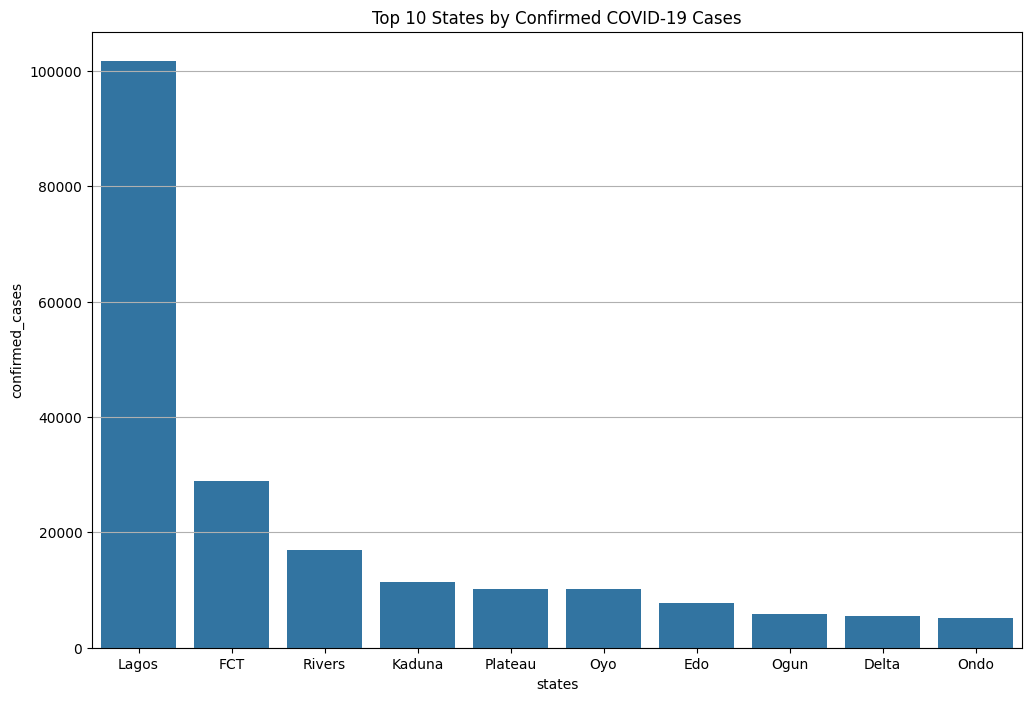

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.grid(True, axis='y')
sns.barplot(x='states', y='confirmed_cases', data=df.sort_values('confirmed_cases', ascending=False).head(10))
plt.title('Top 10 States by Confirmed COVID-19 Cases')
plt.show()

From the above bar chart, it is evident that Lagos has the highest caes, with a little over 100,000 cases.

For detailed reasons, consult the README for this project.

Correlation Heatmap

Correlation Heatmap - This shows the relationship between features and help us answer certain questions.

If 2 features are highly correlated, it means the cause of one would affect or lead to the other.

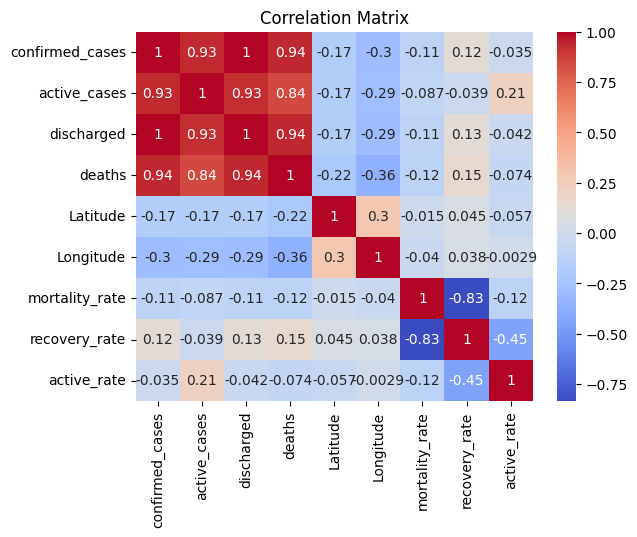

In [73]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Geospatial Mapping

In [74]:
import folium

m = folium.Map(location=[9.08, 7.53], zoom_start=6)  # Center on Nigeria

for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['confirmed_cases'] / 10000,  # Scale for visibility
        popup=f"{row['states']}: {row['confirmed_cases']} cases",
        color='red',
        fill=True
    ).add_to(m)

m.save('nigeria_covid_map.html')  # Save as HTML for repo

Box plot for rates

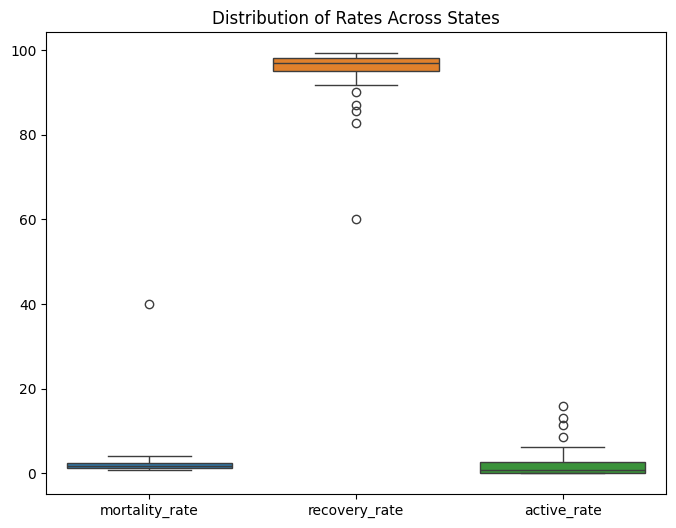

In [87]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['mortality_rate', 'recovery_rate', 'active_rate']])
plt.title('Distribution of Rates Across States')
plt.show()

Hypothesis testing

In [76]:
from scipy import stats

north = df[df['Latitude'] > 10]['mortality_rate']
south = df[df['Latitude'] <= 10]['mortality_rate']
t_stat, p_val = stats.ttest_ind(north, south)
print(f"T-stat: {t_stat}, P-value: {p_val}")

T-stat: -0.49105653699394464, P-value: 0.6264515827005714


For proper explanation of everything in this notebook, please consult the readme file

Thank you for staying with me up till this moment.